# Choosing Number of Clusters

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
session_name = 'HCP_1200'
bundle_name = 'ARC_R'
aws_path = f's3://hcp-subbundle/MASE_ChooseK_Study/{session_name}/{bundle_name}'
model_name = 'mase_kmeans_fa_r2_is_mdf'

In [3]:
def aws_download(aws_path, endswith_pattern):
    aws_files = !aws s3 ls --recursive {aws_path}
        
    remote_filenames = []
    local_filenames = []

    for file in aws_files:
        if file.split()[3].endswith(endswith_pattern):
            remote_filenames.append(file.split()[3])
            local_filenames.append(file.split()[3].replace('/', '_'))

    for remote_filename, local_filename in zip(remote_filenames, local_filenames):
        !aws s3 cp s3://hcp-subbundle/{remote_filename} {local_filename}
            
    return local_filenames

def remove_aws_downloads(local_filenames):
    for file in local_filenames:
        !rm {file}

## Silhouette Scores

In [ ]:
max_n_clusters = 9

#### Download Silhouette Scores

In [ ]:
local_silhouette_score_filenames = aws_download(aws_path, f'{max_n_clusters}/{model_name}_silhouette_scores.npy')

#### Aggregate Silhouette Scores

In [ ]:
df = pd.DataFrame()

subjects = [
    '103818', '105923', '111312', '114823', '115320',
    '122317', '125525', '130518', '135528', '137128',
    '139839', '143325', '144226', '146129', '149337',
    '149741', '151526', '158035', '169343', '172332',
    '175439', '177746', '185442', '187547', '192439',
    '194140', '195041', '200109', '200614', '204521',
    '250427', '287248', '341834', '433839', '562345',
    '599671', '601127', '627549', '660951', # '662551', 
    '783462', '859671', '861456', '877168', '917255'
]

for fname in local_silhouette_score_filenames:
    #fname = f'MASE_ChooseK_Study_{session_name}_{bundle_name}_{subject}_{max_n_clusters}_{model_name}_silhouette_scores.npy'
    if os.path.exists(fname):
        df = df.append(pd.Series(np.load(fname), name=subject))

display(df) 

df1 = pd.melt(frame = df, var_name = 'cluster_number', value_name = 'silhouette_score')

# offset column index to correspond to clusters, clusters begin with two
df1['cluster_number'] = df1['cluster_number'] + 2

fig, ax = plt.subplots()
sns.lineplot(ax = ax, data = df1, x='cluster_number', y='silhouette_score', sort=False).set(
    title=f'MASE_ChooseK_Study_{session_name}_{bundle_name}\nn_subjects: {len(df)}'
)
plt.show()

#### Clean up

In [ ]:
remove_aws_downloads(local_silhouette_score_filenames)

## Pair Plots

`best_n_cluster` is chosen from maximal value in the Aggregate Silhouette Scores

In [34]:
best_n_cluster = 9

There's code to generate an animated gif, but much better/easier to inspect the pairplots individually.

Looking for patterns and differences in number of embedded components and number of clusters.

#### Download Pair Plots

In [35]:
local_pairplot_filenames = aws_download(aws_path, f'{best_n_cluster}/{model_name}_pairplot.png')

download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/103818/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_103818_9_mase_kmeans_fa_r2_is_mdf_pairplot.png
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/105923/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_105923_9_mase_kmeans_fa_r2_is_mdf_pairplot.png
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/111312/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_111312_9_mase_kmeans_fa_r2_is_mdf_pairplot.png
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/114823/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_114823_9_mase_kmeans_fa_r2_is_mdf_pairplot.png
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/115320/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_115320_9_mase_kmeans_fa_r2_is_mdf_pairplot.png
download: s3://hcp-s

download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/877168/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_877168_9_mase_kmeans_fa_r2_is_mdf_pairplot.png
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/917255/9/mase_kmeans_fa_r2_is_mdf_pairplot.png to ./MASE_ChooseK_Study_HCP_1200_ARC_R_917255_9_mase_kmeans_fa_r2_is_mdf_pairplot.png


#### Info File

In [36]:
local_info_filenames = aws_download(aws_path, f'{best_n_cluster}/{model_name}_info.pkl')

download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/103818/9/mase_kmeans_fa_r2_is_mdf_info.pkl to ./MASE_ChooseK_Study_HCP_1200_ARC_R_103818_9_mase_kmeans_fa_r2_is_mdf_info.pkl
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/105923/9/mase_kmeans_fa_r2_is_mdf_info.pkl to ./MASE_ChooseK_Study_HCP_1200_ARC_R_105923_9_mase_kmeans_fa_r2_is_mdf_info.pkl
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/111312/9/mase_kmeans_fa_r2_is_mdf_info.pkl to ./MASE_ChooseK_Study_HCP_1200_ARC_R_111312_9_mase_kmeans_fa_r2_is_mdf_info.pkl
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/114823/9/mase_kmeans_fa_r2_is_mdf_info.pkl to ./MASE_ChooseK_Study_HCP_1200_ARC_R_114823_9_mase_kmeans_fa_r2_is_mdf_info.pkl
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC_R/115320/9/mase_kmeans_fa_r2_is_mdf_info.pkl to ./MASE_ChooseK_Study_HCP_1200_ARC_R_115320_9_mase_kmeans_fa_r2_is_mdf_info.pkl
download: s3://hcp-subbundle/MASE_ChooseK_Study/HCP_1200/ARC

In [37]:
info_dfs = []
for local_info_filename in local_info_filenames:
    info_dfs.append(pd.read_pickle(local_info_filename))

In [38]:
info_df = pd.concat(info_dfs)
# fix offset issue
info_df['n_clusters selected'] = info_df['n_clusters selected'] + 1
display(info_df)

,subject,session,bundle,algorithm,embed dimensions,max n_clusters,n_clusters selected,labels,scores
0,103818,HCP_1200,ARC_R,kmeans,"(294, 3)",9,4,"[0, 1, 2, 3]","[0.49215459078427354, 0.49362251162530607, 0.5..."
0,105923,HCP_1200,ARC_R,kmeans,"(680, 2)",9,2,"[0, 1]","[0.681787600425543, 0.616888839828224, 0.56595..."
0,111312,HCP_1200,ARC_R,kmeans,"(696, 3)",9,5,"[0, 1, 2, 3, 4]","[0.3811652553353222, 0.423868419866478, 0.4437..."
0,114823,HCP_1200,ARC_R,kmeans,"(974, 3)",9,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0.45183360929336036, 0.44551800291387245, 0.3..."
0,115320,HCP_1200,ARC_R,kmeans,"(813, 2)",9,2,"[0, 1]","[0.6528857829947033, 0.5562824882449355, 0.486..."
0,122317,HCP_1200,ARC_R,kmeans,"(3253, 3)",9,3,"[0, 1, 2]","[0.38438769806544687, 0.5061642131862046, 0.41..."
0,125525,HCP_1200,ARC_R,kmeans,"(312, 4)",9,5,"[0, 1, 2, 3, 4]","[0.32638326624854785, 0.3757866809828426, 0.42..."
0,130518,HCP_1200,ARC_R,kmeans,"(1009, 3)",9,3,"[0, 1, 2]","[0.42248315397077324, 0.5264271628645539, 0.46..."
0,135528,HCP_1200,ARC_R,kmeans,"(63, 3)",9,3,"[0, 1, 2]","[0.4352378386249016, 0.5536059506999829, 0.508..."
0,137128,HCP_1200,ARC_R,kmeans,"(4062, 3)",9,3,"[0, 1, 2]","[0.3977193547757412, 0.41708184955830224, 0.39..."


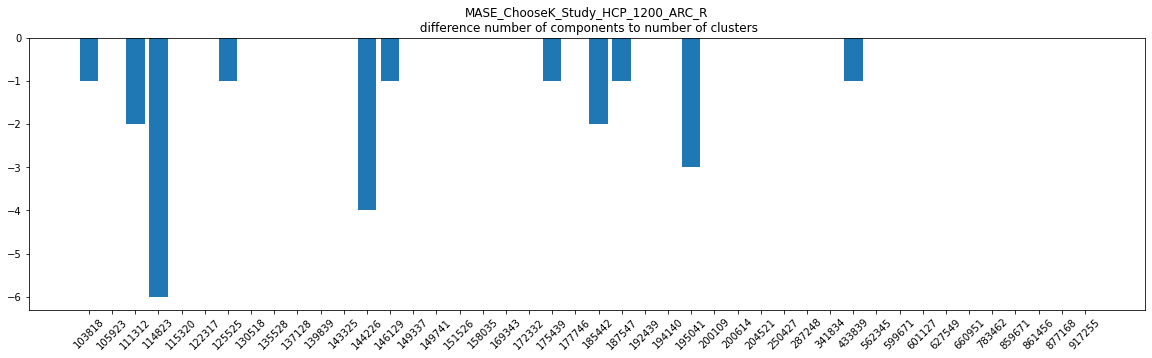

In [39]:
diff = {}
for subject, dims, n_cluster in zip(info_df['subject'], info_df['embed dimensions'].tolist(), info_df['n_clusters selected']):
    diff[subject] = dims[1]-n_cluster
    
plt.figure(figsize=(20,5))
plt.bar(*zip(*diff.items()))
plt.xticks(rotation=45)
plt.title(f'MASE_ChooseK_Study_{session_name}_{bundle_name}\n difference number of components to number of clusters')
plt.show()

In [40]:
remove_aws_downloads(local_info_filenames)

#### Create Animated gif of pair plots

#### Clean up

In [41]:
remove_aws_downloads(local_pairplot_filenames)